# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [ ]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from scipy import stats

# Import API key
from config import api
# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [ ]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

In [ ]:
# Perform API Calls
# Perform a weather check on each city using a series of successive API calls.
#* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [ ]:
url = "http://api.openweathermap.org/data/2.5/weather"
query = "Nashville"
url_params = {
    "api" : api,
    "q" : query,
    'page': 2
}
city_name = []
Lat = []
Long = []
MaxTemp = []
Humidity = []
Cloundiness = []
WindSpeed = []
Date = []
#enum
for city in cities:
   
    try: 
        # Build partial query URL
        query_url = f"{url}?appid={api}&q={city}"
        #query_url
    

    
        print("City : ",city)
        city_weather = requests.get(query_url).json()
    
    
    
        print(city_weather)
        city_name.append(city_weather['name'])
        Lat.append(city_weather['coord']['lat'])
        Long.append(city_weather['coord']['lon'])
        MaxTemp.append(city_weather['main']['temp_max'])
        Humidity.append(city_weather['main']['humidity'])
        Cloundiness.append(city_weather['clouds']['all'])
        WindSpeed.append(city_weather['wind']['speed'])
      
    except: 
        print("City not found")
    
    time.sleep(1)
print(city_name) 
    

In [ ]:
# Get data from csv file
data = requests.get(query_url).json()
data




### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [ ]:
#Create DF
city_weather_df = pd.DataFrame({
    'city' : city_name,
    'Lat' : Lat,
    'Long' :Long,
    'MaxTemp' : MaxTemp,
    'Humidity' : Humidity,
    'Cloundiness' : Cloundiness,
    'Wind Speed' : WindSpeed 
})


city_weather_df
   


In [ ]:
#export to csv
city_weather_df = city_weather_df.to_csv("cities.csv")

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [ ]:
#  Get the indices of cities that have humidity over 100%.
#city_weather_df.drop(['Humidity'], >= 100)

# CREATE INDEX
index_names = city_weather_df[city_weather_df['Humidity'] > 100 ].index 
# drop these row indexes 
# from dataFrame 
city_clean_data = city_weather_df.drop(index_names, inplace = False) 
  
city_clean_data
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [ ]:

# Create Latitude vs. Temperature Plot scatter plot
plt.scatter(city_clean_data["Lat"], city_clean_data["MaxTemp"], facecolor = "lightblue", edgecolor = "black")

# Set title/
plt.title("City Latitude vs. Max Temperature (107/20)")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Max Temperature (F)")

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("../City Latitude vs Max Temperature.png")

## Latitude vs. Humidity Plot

In [ ]:
# Create Latitude vs. Humnidity Plot scatter plot
plt.scatter(city_clean_data["Lat"],city_clean_data["Humidity"], facecolor = "darkviolet", edgecolor = "black")

# Title/
plt.title("City Latitude vs. Humidity")

# Set xX.xlabel("Laitude")

# Y axis label
plt.ylabel("Humidity (%)")

# Grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save  as .pngs
plt.savefig("../City Latitude vs Humidity.png")

## Latitude vs. Cloudiness Plot

In [ ]:
# Create Latitude vs. Cloundiness Plot scatter plot
plt.scatter(city_clean_data["Lat"], city_clean_data["Cloundiness"], facecolor = "deepskyblue", edgecolor = "black")

# Title/
plt.title("City Latitude vs. Cloundiness ")

#X axis label
plt.xlabel("Laitude")

# Y axis label
plt.ylabel("Cloundiness")

# Grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save  as .pngs
plt.savefig("../City Latitude vs Cloudiness.png")

## Latitude vs. Wind Speed Plot

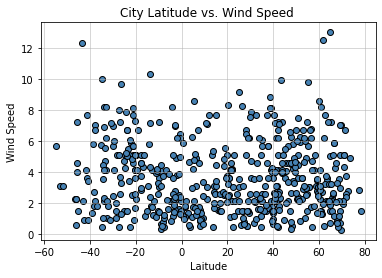

In [306]:
# Create Latitude vs. Wind Speed Plot scatter plot
plt.scatter(city_clean_data["Lat"], city_clean_data["Wind Speed"], facecolor = "steelblue", edgecolor = "black")

# Title/
plt.title("City Latitude vs. Wind Speed ")

#X axis label
plt.xlabel("Laitude")

# Y axis label
plt.ylabel("Wind Speed")

# Grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save  as .pngs
plt.savefig("../City Latitude vs Wind.png")

## Linear Regression

In [291]:
#Define North and south
north = city_clean_data.loc[city_weather_df['Lat'] >= 0]
south = city_clean_data.loc[city_weather_df['Lat'] < 0]



####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [300]:
# Perform a linear regression on temperature vs. latitude
x_values = north['MaxTemp']
y_values = north['Lat']
#city_clean_data.loc[:,("MaxTemp", 'Lat')]
# y = mx + b
result = stats.linregress(x_values, y_values)
slope = result.slope
intercept = result.intercept
rvalue = result.rvalue

print(slope, intercept, rvalue)

# Get regression values
regress_values = x_values * slope + intercept
north['regress Temp'] = regress_values

north

-1.3424701620591721 423.3633226802769 -0.8592746241052742


C:\Users\jocel\.conda\envs\PythonData\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


,city,Lat,Long,MaxTemp,Humidity,Cloundiness,Wind Speed,regress Temp,regress hum
0,Upernavik,72.79,-56.15,269.75,95,88,2.77,61.231996,46.138425
5,Basco,20.45,121.97,302.05,84,100,8.34,17.870210,42.963891
7,Ashcroft,50.72,-121.29,282.15,48,75,3.60,44.585366,32.574507
8,Yumen,40.28,97.20,274.76,70,0,2.65,54.506221,38.923575
9,Pevek,69.70,170.31,271.90,99,95,0.25,58.345686,47.292801
...,...,...,...,...,...,...,...,...,...
534,Greencastle,39.64,-86.86,289.82,82,90,0.81,34.288620,42.386703
536,Naze,28.37,129.48,299.15,88,75,5.10,21.763374,44.118267
537,Panjāb,34.39,67.02,270.90,77,0,2.32,59.688156,40.943733
538,Berezovyy,51.67,135.70,277.57,88,100,0.83,50.733880,44.118267


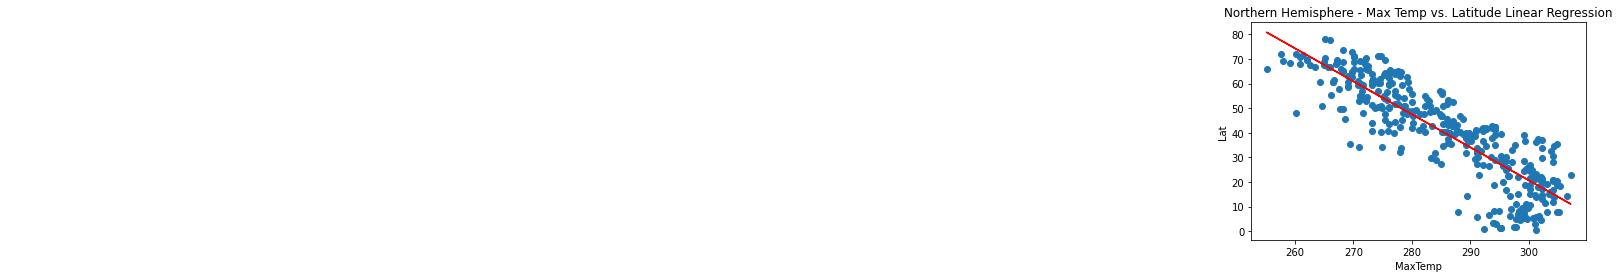

In [301]:
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, color='red')

plt.xlabel('MaxTemp')
plt.ylabel('Lat')

#y = mx + b
eq = f'y = {round(slope, 2)}x + {round(intercept, 2)}'
r_squared = f'r^2 = {round(rvalue ** 2, 2)}'
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')
plt.annotate(eq, (40, 20.5), color='red')
plt.annotate(r_squared, (40, 19), color='red')
plt.savefig("Northern - Max Temp Lat")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [294]:
# Perform a linear regression on temperature vs. latitude
#x_values = south['MaxTemp']
#y_values = south['Lat']
city_clean_data.loc[:, ('MaxTemp', 'Lat')]

# y = mx + b
result = stats.linregress(x_values, y_values)
slope = result.slope
intercept = result.intercept
rvalue = result.rvalue

print(slope, intercept, rvalue)

# Get regression values
regress_values = x_values * slope + intercept
south['regress temp'] = regress_values

south

-1.3424701620591721 423.3633226802769 -0.8592746241052742


C:\Users\jocel\.conda\envs\PythonData\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


,city,Lat,Long,MaxTemp,Humidity,Cloundiness,Wind Speed,regress temp
1,Punta Arenas,-53.15,-70.92,282.15,54,90,3.10,NaN
2,Avarua,-21.21,-159.78,298.15,83,54,5.10,NaN
3,Hermanus,-34.42,19.23,282.59,94,0,3.54,NaN
4,Hithadhoo,-0.60,73.08,301.16,75,16,6.43,NaN
6,Ushuaia,-54.80,-68.30,285.15,46,75,5.70,NaN
...,...,...,...,...,...,...,...,...
526,Santa Maria,-29.68,-53.81,294.30,76,12,6.01,NaN
528,Chala,-7.58,31.27,292.15,82,40,1.24,NaN
535,Itarema,-2.92,-39.92,299.69,80,61,7.03,NaN
540,Denpasar,-8.65,115.22,298.15,100,40,0.50,NaN


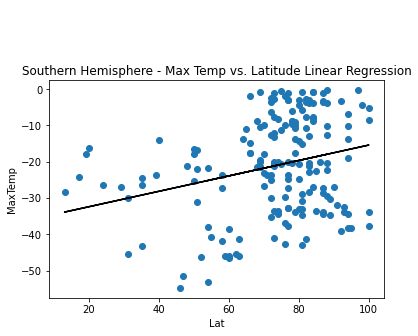

In [299]:
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, color='black')

plt.xlabel('Lat')
plt.ylabel('MaxTemp')

#y = mx + b
eq = f'y = {round(slope, 2)}x + {round(intercept, 2)}'
r_squared = f'r^2 = {round(rvalue ** 2, 2)}'
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.annotate(eq, (40, 20.5), color='red')
plt.annotate(r_squared, (40, 19), color='red')
plt.savefig("South - Max Temp Lat")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [296]:
# Perform a linear regression on temperature vs. latitude
x_values = north['Humidity']
y_values = north['Lat']

# y = mx + b
result = stats.linregress(x_values, y_values)
slope = result.slope
intercept = result.intercept
rvalue = result.rvalue

print(slope, intercept, rvalue)

# Get regression values
regress_values = x_values * slope + intercept
north['regress hum'] = regress_values

north

0.2885940024906347 18.72199474011428 0.31014700007760565


C:\Users\jocel\.conda\envs\PythonData\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


,city,Lat,Long,MaxTemp,Humidity,Cloundiness,Wind Speed,regress Temp,regress hum
0,Upernavik,72.79,-56.15,269.75,95,88,2.77,61.231996,46.138425
5,Basco,20.45,121.97,302.05,84,100,8.34,17.870210,42.963891
7,Ashcroft,50.72,-121.29,282.15,48,75,3.60,44.585366,32.574507
8,Yumen,40.28,97.20,274.76,70,0,2.65,54.506221,38.923575
9,Pevek,69.70,170.31,271.90,99,95,0.25,58.345686,47.292801
...,...,...,...,...,...,...,...,...,...
534,Greencastle,39.64,-86.86,289.82,82,90,0.81,34.288620,42.386703
536,Naze,28.37,129.48,299.15,88,75,5.10,21.763374,44.118267
537,Panjāb,34.39,67.02,270.90,77,0,2.32,59.688156,40.943733
538,Berezovyy,51.67,135.70,277.57,88,100,0.83,50.733880,44.118267


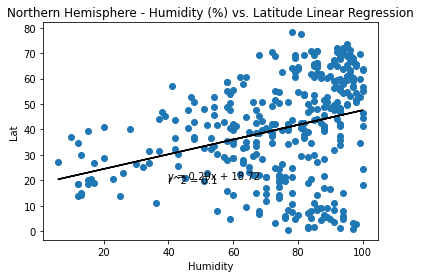

In [297]:
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, color='black')

plt.xlabel('Humidity')
plt.ylabel('Lat')

#y = mx + b
eq = f'y = {round(slope, 2)}x + {round(intercept, 2)}'
r_squared = f'r^2 = {round(rvalue ** 2, 2)}'
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.annotate(eq, (40, 20.5), color='black')
plt.annotate(r_squared, (40, 19), color='black')
plt.savefig("Northern - Humitity Lat")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [298]:
# Perform a linear regression on temperature vs. latitude
x_values = south['Humidity']
y_values = south['Lat']

# y = mx + b
result = stats.linregress(x_values, y_values)
slope = result.slope
intercept = result.intercept
rvalue = result.rvalue

print(slope, intercept, rvalue)

# Get regression values
regress_values = x_values * slope + intercept
south['regress hum'] = regress_values

south

0.21243111232552322 -36.66263188714725 0.26732620940816043


C:\Users\jocel\.conda\envs\PythonData\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


,city,Lat,Long,MaxTemp,Humidity,Cloundiness,Wind Speed,regress temp,regress hum
1,Punta Arenas,-53.15,-70.92,282.15,54,90,3.10,NaN,-25.191352
2,Avarua,-21.21,-159.78,298.15,83,54,5.10,NaN,-19.030850
3,Hermanus,-34.42,19.23,282.59,94,0,3.54,NaN,-16.694107
4,Hithadhoo,-0.60,73.08,301.16,75,16,6.43,NaN,-20.730298
6,Ushuaia,-54.80,-68.30,285.15,46,75,5.70,NaN,-26.890801
...,...,...,...,...,...,...,...,...,...
526,Santa Maria,-29.68,-53.81,294.30,76,12,6.01,NaN,-20.517867
528,Chala,-7.58,31.27,292.15,82,40,1.24,NaN,-19.243281
535,Itarema,-2.92,-39.92,299.69,80,61,7.03,NaN,-19.668143
540,Denpasar,-8.65,115.22,298.15,100,40,0.50,NaN,-15.419521


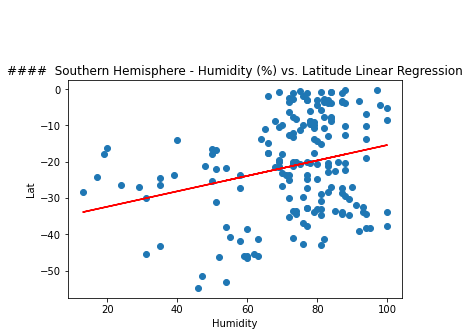

In [278]:
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, color='red')

plt.xlabel('Humidity')
plt.ylabel('Lat')

#y = mx + b
eq = f'y = {round(slope, 2)}x + {round(intercept, 2)}'
r_squared = f'r^2 = {round(rvalue ** 2, 2)}'
plt.title("####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.annotate(eq, (40, 20.5), color='red')
plt.annotate(r_squared, (40, 19), color='red')
plt.savefig("South - Humidity Lat")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [279]:
# Perform a linear regression on temperature vs. latitude
x_values = north['Cloundiness']
y_values = north['Lat']

# y = mx + b
result = stats.linregress(x_values, y_values)
slope = result.slope
intercept = result.intercept
rvalue = result.rvalue

print(slope, intercept, rvalue)

# Get regression values
regress_values = x_values * slope + intercept
north['regress cloud'] = regress_values

north

0.13836161872746155 32.30278708376061 0.2703872308178128


C:\Users\jocel\.conda\envs\PythonData\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


,city,Lat,Long,MaxTemp,Humidity,Cloundiness,Wind Speed,regress temp,regress tXemp,regress Temp,regress wind,regress cloud
0,Upernavik,72.79,-56.15,269.75,95,88,2.77,61.231996,61.231996,61.231996,39.582436,44.478610
5,Basco,20.45,121.97,302.05,84,100,8.34,17.870210,17.870210,17.870210,44.132203,46.138949
7,Ashcroft,50.72,-121.29,282.15,48,75,3.60,44.585366,44.585366,44.585366,40.260408,42.679908
8,Yumen,40.28,97.20,274.76,70,0,2.65,54.506221,54.506221,54.506221,39.484416,32.302787
9,Pevek,69.70,170.31,271.90,99,95,0.25,58.345686,58.345686,58.345686,37.524013,45.447141
...,...,...,...,...,...,...,...,...,...,...,...,...
534,Greencastle,39.64,-86.86,289.82,82,90,0.81,34.288620,34.288620,34.288620,37.981441,44.755333
536,Naze,28.37,129.48,299.15,88,75,5.10,21.763374,21.763374,21.763374,41.485660,42.679908
537,Panjāb,34.39,67.02,270.90,77,0,2.32,59.688156,59.688156,59.688156,39.214860,32.302787
538,Berezovyy,51.67,135.70,277.57,88,100,0.83,50.733880,50.733880,50.733880,37.997777,46.138949


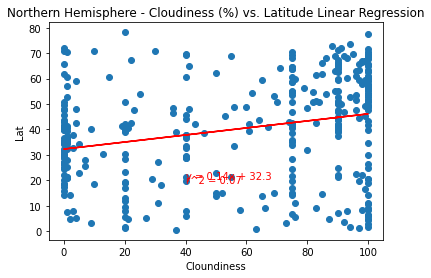

In [280]:
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, color='red')

plt.xlabel('Cloundiness')
plt.ylabel('Lat')

#y = mx + b
eq = f'y = {round(slope, 2)}x + {round(intercept, 2)}'
r_squared = f'r^2 = {round(rvalue ** 2, 2)}'
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.annotate(eq, (40, 20.5), color='red')
plt.annotate(r_squared, (40, 19), color='red')
plt.savefig("Northern - Cloundiness Lat")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [281]:
x_values = south['Cloundiness']
y_values = south['Lat']

# y = mx + b
result = stats.linregress(x_values, y_values)
slope = result.slope
intercept = result.intercept
rvalue = result.rvalue

print(slope, intercept, rvalue)

# Get regression values
regress_values = x_values * slope + intercept
south['regress scloud'] = regress_values

south

0.010964308612268887 -21.73206626288496 0.029322707200704977


C:\Users\jocel\.conda\envs\PythonData\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,city,Lat,Long,MaxTemp,Humidity,Cloundiness,Wind Speed,regress temp,regress hum,regress scloud
1,Punta Arenas,-53.15,-70.92,282.15,54,90,3.10,NaN,-25.191352,-20.745278
2,Avarua,-21.21,-159.78,298.15,83,54,5.10,NaN,-19.030850,-21.139994
3,Hermanus,-34.42,19.23,282.59,94,0,3.54,NaN,-16.694107,-21.732066
4,Hithadhoo,-0.60,73.08,301.16,75,16,6.43,NaN,-20.730298,-21.556637
6,Ushuaia,-54.80,-68.30,285.15,46,75,5.70,NaN,-26.890801,-20.909743
...,...,...,...,...,...,...,...,...,...,...
526,Santa Maria,-29.68,-53.81,294.30,76,12,6.01,NaN,-20.517867,-21.600495
528,Chala,-7.58,31.27,292.15,82,40,1.24,NaN,-19.243281,-21.293494
535,Itarema,-2.92,-39.92,299.69,80,61,7.03,NaN,-19.668143,-21.063243
540,Denpasar,-8.65,115.22,298.15,100,40,0.50,NaN,-15.419521,-21.293494


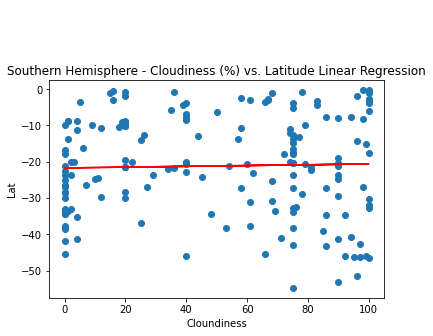

In [282]:
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, color='red')

plt.xlabel('Cloundiness')
plt.ylabel('Lat')

#y = mx + b
eq = f'y = {round(slope, 2)}x + {round(intercept, 2)}'
r_squared = f'r^2 = {round(rvalue ** 2, 2)}'
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.annotate(eq, (40, 20.5), color='red')
plt.annotate(r_squared, (40, 19), color='red')
plt.savefig("South - Cloundiness")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [283]:
# Perform a linear regression on temperature vs. latitude
x_values = north['Wind Speed']
y_values = north['Lat']

# y = mx + b
result = stats.linregress(x_values, y_values)
slope = result.slope
intercept = result.intercept
rvalue = result.rvalue

print(slope, intercept, rvalue)

# Get regression values
regress_values = x_values * slope + intercept
north['regress wind'] = regress_values

south

0.8168343752884579 37.319804657234805 0.09089547914246807


C:\Users\jocel\.conda\envs\PythonData\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


,city,Lat,Long,MaxTemp,Humidity,Cloundiness,Wind Speed,regress temp,regress hum,regress scloud
1,Punta Arenas,-53.15,-70.92,282.15,54,90,3.10,NaN,-25.191352,-20.745278
2,Avarua,-21.21,-159.78,298.15,83,54,5.10,NaN,-19.030850,-21.139994
3,Hermanus,-34.42,19.23,282.59,94,0,3.54,NaN,-16.694107,-21.732066
4,Hithadhoo,-0.60,73.08,301.16,75,16,6.43,NaN,-20.730298,-21.556637
6,Ushuaia,-54.80,-68.30,285.15,46,75,5.70,NaN,-26.890801,-20.909743
...,...,...,...,...,...,...,...,...,...,...
526,Santa Maria,-29.68,-53.81,294.30,76,12,6.01,NaN,-20.517867,-21.600495
528,Chala,-7.58,31.27,292.15,82,40,1.24,NaN,-19.243281,-21.293494
535,Itarema,-2.92,-39.92,299.69,80,61,7.03,NaN,-19.668143,-21.063243
540,Denpasar,-8.65,115.22,298.15,100,40,0.50,NaN,-15.419521,-21.293494


AttributeError: module 'matplotlib.pyplot' has no attribute 'savegfig'

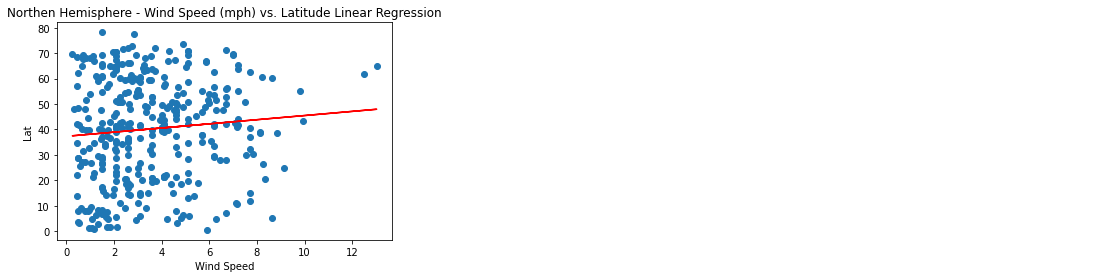

In [284]:
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, color='red')

plt.xlabel('Wind Speed')
plt.ylabel('Lat')

#y = mx + b
eq = f'y = {round(slope, 2)}x + {round(intercept, 2)}'
r_squared = f'r^2 = {round(rvalue ** 2, 2)}'
plt.title("Northen Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.annotate(eq, (40, 20.5), color='red')
plt.annotate(r_squared, (40, 19), color='red')
plt.savegfig("North - Wind")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [285]:
# Perform a linear regression on temperature vs. latitude
x_values = south['Wind Speed']
y_values = south['Lat']

# y = mx + b
result = stats.linregress(x_values, y_values)
slope = result.slope
intercept = result.intercept
rvalue = result.rvalue

print(slope, intercept, rvalue)

# Get regression values
regress_values = x_values * slope + intercept
south['regress wind'] = regress_values

south

-0.8323140235417384 -17.99439198596774 -0.1424267459105969


C:\Users\jocel\.conda\envs\PythonData\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


,city,Lat,Long,MaxTemp,Humidity,Cloundiness,Wind Speed,regress temp,regress hum,regress scloud,regress wind
1,Punta Arenas,-53.15,-70.92,282.15,54,90,3.10,NaN,-25.191352,-20.745278,-20.574565
2,Avarua,-21.21,-159.78,298.15,83,54,5.10,NaN,-19.030850,-21.139994,-22.239194
3,Hermanus,-34.42,19.23,282.59,94,0,3.54,NaN,-16.694107,-21.732066,-20.940784
4,Hithadhoo,-0.60,73.08,301.16,75,16,6.43,NaN,-20.730298,-21.556637,-23.346171
6,Ushuaia,-54.80,-68.30,285.15,46,75,5.70,NaN,-26.890801,-20.909743,-22.738582
...,...,...,...,...,...,...,...,...,...,...,...
526,Santa Maria,-29.68,-53.81,294.30,76,12,6.01,NaN,-20.517867,-21.600495,-22.996599
528,Chala,-7.58,31.27,292.15,82,40,1.24,NaN,-19.243281,-21.293494,-19.026461
535,Itarema,-2.92,-39.92,299.69,80,61,7.03,NaN,-19.668143,-21.063243,-23.845560
540,Denpasar,-8.65,115.22,298.15,100,40,0.50,NaN,-15.419521,-21.293494,-18.410549


AttributeError: module 'matplotlib.pyplot' has no attribute 'savegfig'

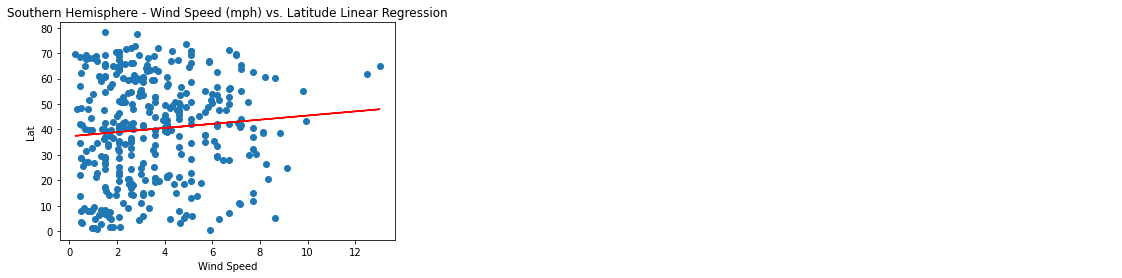

In [276]:
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, color='red')

plt.xlabel('Wind Speed')
plt.ylabel('Lat')

#y = mx + b
eq = f'y = {round(slope, 2)}x + {round(intercept, 2)}'
r_squared = f'r^2 = {round(rvalue ** 2, 2)}'
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.annotate(eq, (40, 20.5), color='red')
plt.annotate(r_squared, (40, 19), color='red')
plt.savegfig("South - Wind")